# Preprocessing iNaturalist data

This section covers:

- Download iNaturalist 'research-grade' vasuclar plant observations
- iNaturalist global observation density 
- Observation growth over the years
- Frequency of observations per species

## Packages

In [ ]:
import pandas as pd # for handling dataframes in python
import numpy as np # array handling
import os # operating system interfaces

# packages needed for plotting:
import matplotlib.pyplot as plt # main Python plotting library 
import seaborn as sns # pretty plots
from matplotlib.colors import LogNorm, Normalize, BoundaryNorm
import cartopy.crs as ccrs # maps 
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Download iNaturalist observation data


For this study we used the following download: GBIF.org (4 January 2022) GBIF Occurrence Download https://doi.org/10.15468/dl.34tjre

If you would like to use the most recent data: Follow the above link and click **'Rerun Query'** and proceed to download. For this analysis the 'simple' version is sufficient.

### Load observations as data frame



In [23]:
iNat = pd.read_csv('/net/data/iNaturalist/Tracheophyta/0091819-210914110416597.csv', sep='\t')

/net/home/swolf/.conda/envs/cartopy/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
iNat.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,1229615436,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/324100,Plantae,Tracheophyta,Liliopsida,Commelinales,Commelinaceae,Commelina,Commelina communis,...,Suzanne Cadwell,2013-07-07T20:33:11,CC_BY_NC_4_0,Suzanne Cadwell,Suzanne Cadwell,NaN,NaN,2021-12-08T05:44:16.778Z,StillImage,NaN
1,1802610589,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/381341,Plantae,Tracheophyta,Magnoliopsida,Caryophyllales,Amaranthaceae,Blitum,Blitum capitatum,...,Kurt Herrmann,2019-09-02T01:11:54,CC_BY_NC_4_0,Kurt Herrmann,Kurt Herrmann,NaN,NaN,2021-12-08T04:57:17.866Z,StillImage;StillImage,NaN
2,1212005116,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://conabio.inaturalist.org/observations/57...,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Passifloraceae,Passiflora,Passiflora vitifolia,...,Alexis López Hernández,2017-02-23T17:24:07,CC_BY_4_0,Francisco Farriols Sarabia,Francisco Farriols Sarabia,NaN,NaN,2021-12-08T05:44:36.176Z,StillImage,NaN
3,911497199,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/696216,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Plantaginaceae,Cymbalaria,Cymbalaria muralis,...,Jeff,2014-05-24T15:42:54,CC_BY_NC_4_0,Todd Plummer,Todd Plummer,NaN,NaN,2021-12-08T05:44:36.371Z,StillImage,NaN
4,1038333063,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/1018638,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Xanthium,Xanthium spinosum,...,Ken-ichi Ueda,2014-10-14T07:24:41,CC0_1_0,Ken-ichi Ueda,Ken-ichi Ueda,NaN,NaN,2021-12-08T05:44:34.461Z,StillImage,NaN


The dimensions of the dataframe:

In [5]:
iNat.shape

(14019405, 50)

The number of vascular plant species in the iNaturalist observations:

In [6]:
iNat["scientificName"].nunique()

103625

### Extract relavent columns

- scientificName
- decimalLatitude
- decimalLongitude
- eventDate

In [7]:
iNat = iNat[["gbifID", "scientificName","decimalLatitude","decimalLongitude","eventDate", "dateIdentified"]]

Keep only the first two words of scientific name, as some names are annotated with additional information.

In [8]:
iNat['scientificName']  = iNat['scientificName'].apply(lambda x: ' '.join(x.split()[0:2]))

In [9]:
iNat.head()

,gbifID,scientificName,decimalLatitude,decimalLongitude,eventDate,dateIdentified
0,1229615436,Commelina communis,35.987483,-79.057546,2013-07-07T00:00:00,2013-07-07T20:33:11
1,1802610589,Blitum capitatum,40.320259,-105.604856,2013-08-24T13:30:00,2019-09-02T01:11:54
2,1212005116,Passiflora vitifolia,23.189257,-106.404924,2014-03-18T12:49:37,2017-02-23T17:24:07
3,911497199,Cymbalaria muralis,37.996569,-123.018465,2014-05-23T08:58:53,2014-05-24T15:42:54
4,1038333063,Xanthium spinosum,37.934966,-122.148014,2014-10-13T18:00:04,2014-10-14T07:24:41


Save the edited dataframe as a csv file:

In [10]:
iNat.to_csv("Data/iNat/observations.csv", index=False)

## Density of Observations

We want to visualize the global distribution of iNaturalist vascualr plant observations. First, we load the observations:

In [11]:
iNat = pd.read_csv('Data/iNat/observations.csv')

Using the ```.shape``` function, we can have aquick look at the number of rows and colums in our dataframe.

In [12]:
iNat.shape

(14019405, 6)

One version of plotting the density, is by aggregating the iNaturalist observations in hexagonal bins and count the number of observations per hexagon. The function ```hexbin``` provides this functionality.

In [13]:
def hexmap(long, lat, label):
    
    ax = plt.subplot(projection=ccrs.PlateCarree())
    
    # add coastline outline and extent of map:
    ax.coastlines(resolution='110m', color='orange', linewidth=1)
    ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
    
    # hexbin aggregates observations in hexagonal bins and plots the density
    hb = ax.hexbin(long,
          lat, 
          mincnt=1, # min. nuber of observations per hexagon 
          gridsize=(100, 30), # bin size
          cmap="cool", 
          transform=ccrs.PlateCarree(), 
          bins='log', 
          extent=[-180, 180, -90, 90],
          linewidths=0.1)
    cb = fig.colorbar(hb, ax=ax, shrink=0.4)
    cb.set_label(label)

Apply the ```hexmap``` function to our iNaturalist observations and save output as ```.pdf```:

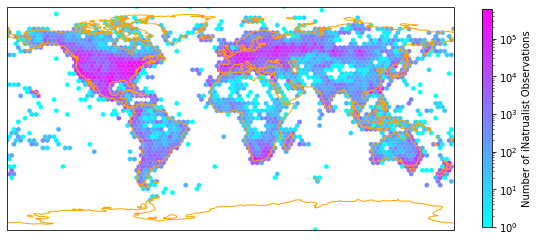

In [14]:
fig = plt.figure(figsize=(10, 10))
hexmap(iNat['decimalLongitude'], iNat['decimalLatitude'], "Number of iNatrualist Observations")
plt.savefig('Figures/iNat_density_hex_tight.pdf', bbox_inches='tight')

A second plotting option is to grid the data into a latitude/longitude grid. Then we can project our map onto a more realistic representation of the spherical Earth, such as the Robinson projection. The previously used ```hexbin``` function does not have a reprojection functionality implemented.

In [15]:
def gridmap(long, lat, label, projection, colorbar=True):
    
    plt.rcParams.update({'font.size': 15})

    Z, xedges, yedges = np.histogram2d(np.array(long,dtype=float),
                                   np.array(lat),bins = [181, 91])

    #https://stackoverflow.com/questions/67801227/color-a-2d-histogram-not-by-density-but-by-the-mean-of-a-third-column
    #https://medium.com/analytics-vidhya/custom-strava-heatmap-231267dcd084
    
    #let function know what projection provided data is in:
    data_crs = ccrs.PlateCarree()
    
    #for colorbar
    cmap = plt.get_cmap('cool')
    im_ratio = Z.shape[0]/Z.shape[1]

    #plot map
    #create base plot of a world map
    ax = fig.add_subplot(1, 1, 1, projection=projection) # I used the PlateCarree projection from cartopy
    
    # set figure to map global extent (-180,180,-90,90)
    ax.set_global()
    
    #add coastlines
    ax.coastlines(resolution='110m', color='orange', linewidth=1.3)
    
    #add grid with values
    im = ax.pcolormesh(xedges, yedges, Z.T, cmap="cool", norm=LogNorm(), transform=data_crs)
    
    #add color bar
    if colorbar==True:
        fig.colorbar(im,fraction=0.046*im_ratio, pad=0.04, shrink=0.3, location="left", label=label)


Apply the ```gridmap``` function to our iNaturalist observations and save output as ```.pdf```. You can also experiment with other projections. See https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html for inspiration:

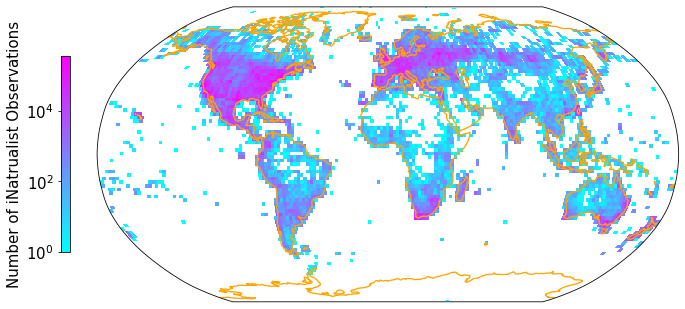

In [16]:
fig = plt.figure(figsize=(12, 12))
gridmap(iNat['decimalLongitude'], iNat['decimalLatitude'], "Number of iNatrualist Observations", ccrs.Robinson())
plt.savefig('Figures/iNat_density_Robinson_all.pdf', bbox_inches='tight')

## Growth of observations over time

The number of iNaturalist observations added every year is growing continually. Here we plot the growth of observations added every year (using the so-called "date identified") since the iNaturalist project started in 2008.

In [17]:
# extract the year from 'dateIdentified':
iNat['year'] = iNat['dateIdentified'].str[:4] 

In [18]:
def catbarplot(df, column, label):
    
    # sort dataframe by column 
    df = df.sort_values(by=[column])
    
    # white background 
    sns.set_theme(style="white")
    
    ax = sns.countplot(x=column, data=df, palette="cool",)
    
    # make remove top and right border of plot
    sns.despine()
    
    # set label text
    plt.xlabel(column)
    plt.ylabel(label) 
    
    # rotate x tick labels sightly
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

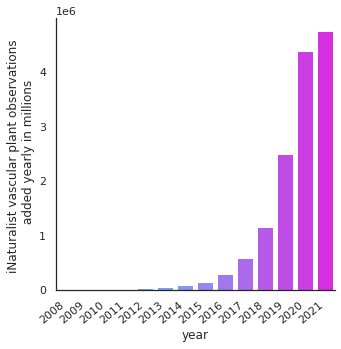

In [19]:
plt.figure(figsize=(5,5))
catbarplot(iNat, "year", "iNaturalist vascular plant observations \n added yearly in millions")
plt.savefig('Figures/iNat_growth.pdf', bbox_inches='tight')

## Frequency distribution of observations

Most species have only been observed one or two times, few species have been observed many times. The most observed species is *Achillea millefolium*, which has been observed 59,022 times.

In [20]:
species_frequencies = iNat['scientificName'].value_counts()
species_frequencies

Achillea millefolium       59022
Taraxacum officinale       47373
Trifolium repens           44175
Alliaria petiolata         43250
Trifolium pratense         39249
                           ...  
Pseudabutilon orientale        1
Ficus clusiifolia              1
Otospermum glabrum             1
Ficinia montana                1
Poa howellii                   1
Name: scientificName, Length: 90820, dtype: int64

Distribution of frequency unique species ist highly squewed. Most species are rare and few are common, as we can see in the following histogramm:

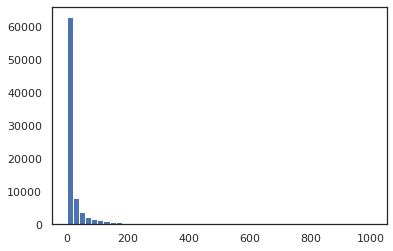

In [21]:
plt.hist(species_frequencies, range = (0,1000), bins=50);